In [15]:
import pandas as pd

In [16]:
dataset = pd.read_csv("/content/insurance.csv")

In [17]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#Data Preprocessing

In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [21]:
dataset['sex']= label_encoder.fit_transform(dataset['sex'])
dataset['smoker']= label_encoder.fit_transform(dataset['smoker'])
dataset['region'] = label_encoder.fit_transform(dataset['region'])

In [23]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#Data Visualizations

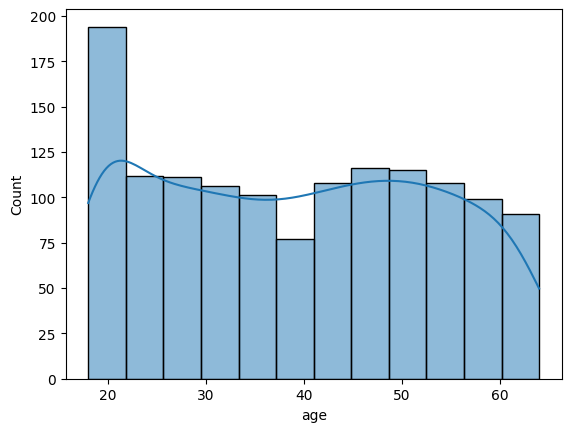

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(dataset['age'], kde=True)
plt.show()

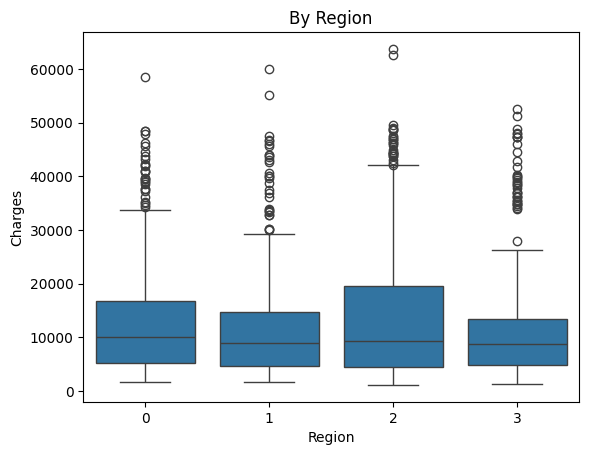

In [29]:
sns.boxplot(x='region', y='charges', data=dataset)
plt.title('By Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

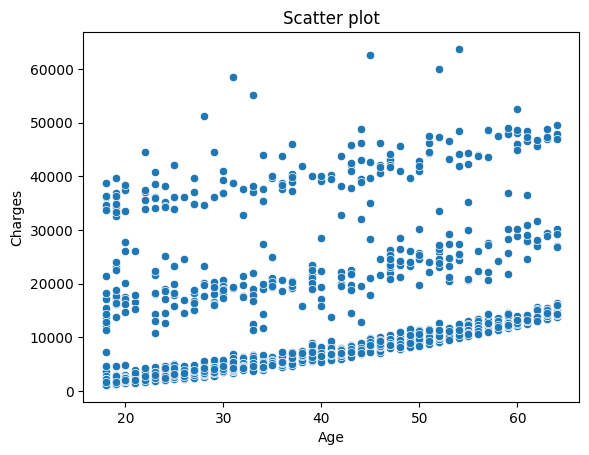

In [33]:
sns.scatterplot(data=dataset, x='age', y='charges')
plt.title('Scatter plot')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

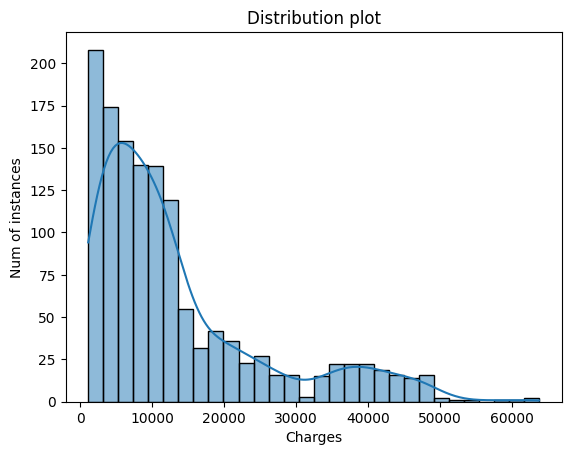

In [34]:
sns.histplot(data=dataset, x='charges', kde=True)
plt.title('Distribution plot')
plt.xlabel('Charges')
plt.ylabel('Num of instances')
plt.show()

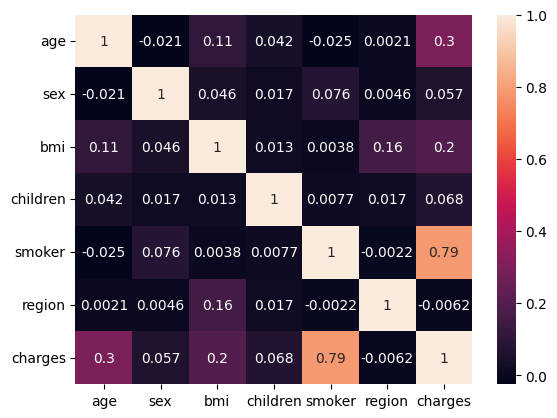

In [35]:
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [69]:
dataset.drop(columns=['sex', 'children'], inplace=True)

In [70]:
dataset.head()

,age,bmi,smoker,region,charges
0,19,27.900,1,3,16884.92400
1,18,33.770,0,2,1725.55230
2,28,33.000,0,2,4449.46200
3,33,22.705,0,1,21984.47061
4,32,28.880,0,1,3866.85520


#Scaling and splitting the data

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [72]:
X, y = dataset.drop('charges', axis=1), dataset['charges']

In [73]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

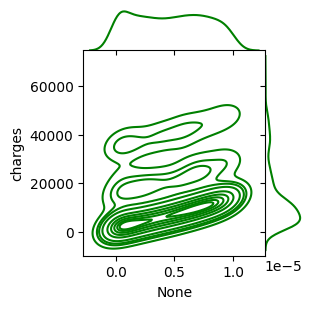

In [75]:
sns.jointplot(x=X[:,0], y=y, kind="kde", space=0, color="g", height = 3)
plt.show()

#Model Predictions

In [76]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, BayesianRidge

Linear Regression Model

In [77]:
reg = LinearRegression().fit(X_train, y_train)
print("W coefficients: ", reg.coef_)
print("W0 intercept: ", reg.intercept_)

W coefficients:  [12275.42166832 11555.32525531 23894.03226137  -645.95280835]
W0 intercept:  -1430.396626668149


In [78]:
y_pred = reg.predict(X_test)
print("Mean Squared Error (Linear Regression):", mean_squared_error(y_test, y_pred))
print("R-squared: ", r2_score(y_test,y_pred))

Mean Squared Error (Linear Regression): 37285853.8618396
R-squared:  0.7463198499483352


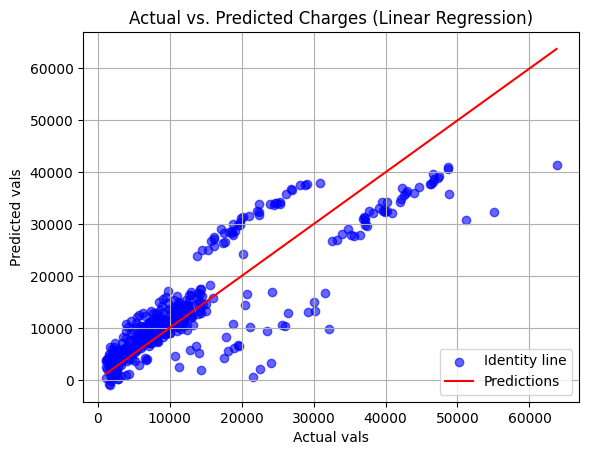

In [79]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')

plt.xlabel('Actual vals')
plt.ylabel('Predicted vals')
plt.title('Actual vs. Predicted Charges (Linear Regression)')

plt.legend(['Identity line', 'Predictions'], loc='lower right')

plt.grid(True)
plt.show()

Ridge Regression

In [80]:
ridge = RidgeCV().fit(X_train, y_train)
print("W coefficients: ", ridge.coef_)
print("W0 intercept: ", ridge.intercept_)

W coefficients:  [12263.39186746 11510.59331922 23878.26603386  -642.87766258]
W0 intercept:  -1405.7493465501539


In [81]:
ridge_pred = ridge.predict(X_test)
print("Mean Squared Error (Ridge Regression):", mean_squared_error(y_test, ridge_pred))
print("R-squared: ", r2_score(y_test,ridge_pred))

Mean Squared Error (Ridge Regression): 37288098.48601803
R-squared:  0.7463045782959681


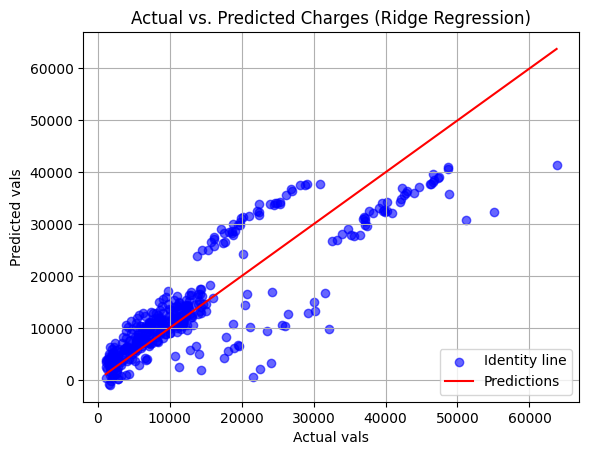

In [82]:
plt.scatter(y_test, ridge_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')

plt.xlabel('Actual vals')
plt.ylabel('Predicted vals')
plt.title('Actual vs. Predicted Charges (Ridge Regression)')

plt.legend(['Identity line', 'Predictions'], loc='lower right')

plt.grid(True)
plt.show()

#Lasso Regression

In [83]:
lasso = LassoCV().fit(X_train, y_train)
print("W coefficients: ", lasso.coef_)
print("W0 intercept: ", lasso.intercept_)

W coefficients:  [12241.98522731 11405.83456266 23871.0421689   -609.47130881]
W0 intercept:  -1370.373400942888


In [84]:
lasso_pred = lasso.predict(X_test)
print("Mean Squared Error (Lasso Regression):", mean_squared_error(y_test, lasso_pred))
print("R-squared: ", r2_score(y_test,lasso_pred))

Mean Squared Error (Lasso Regression): 37305205.95724474
R-squared:  0.7461881849344568


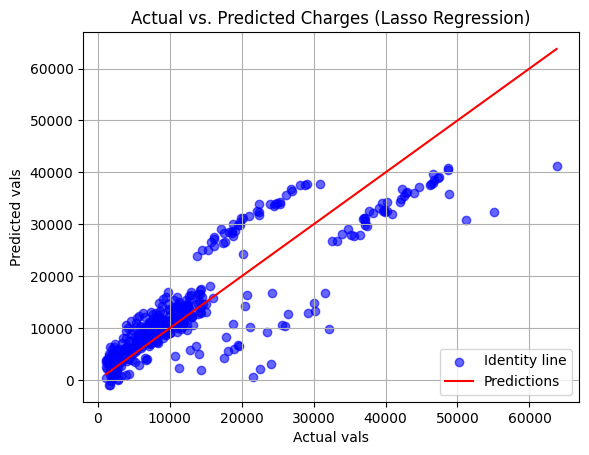

In [85]:
plt.scatter(y_test, lasso_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')

plt.xlabel('Actual vals')
plt.ylabel('Predicted vals')
plt.title('Actual vs. Predicted Charges (Lasso Regression)')

plt.legend(['Identity line', 'Predictions'], loc='lower right')

plt.grid(True)
plt.show()

#Bayesian Ridge

In [86]:
bayesian = BayesianRidge().fit(X_train, y_train)
print("W coefficients: ", bayesian.coef_)
print("W0 intercept: ", bayesian.intercept_)

W coefficients:  [12254.63870479 11478.261295   23866.80005592  -640.65593215]
W0 intercept:  -1387.8932334644578


In [87]:
bayesian_pred = bayesian.predict(X_test)
print("Mean Squared Error (Bayesian Regression):", mean_squared_error(y_test, bayesian_pred))
print("R-squared: ", r2_score(y_test,bayesian_pred))

Mean Squared Error (Bayesian Regression): 37289845.35617323
R-squared:  0.746292693191104


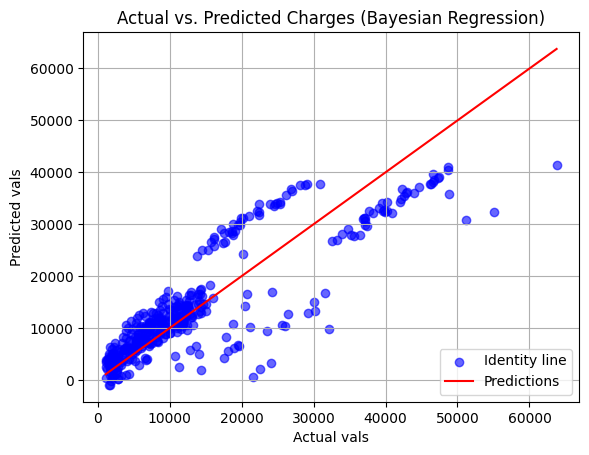

In [88]:
plt.scatter(y_test, bayesian_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')

plt.xlabel('Actual vals')
plt.ylabel('Predicted vals')
plt.title('Actual vs. Predicted Charges (Bayesian Regression)')

plt.legend(['Identity line', 'Predictions'], loc='lower right')

plt.grid(True)
plt.show()

#Elastic Net Regression

In [89]:
elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.3).fit(X_train, y_train)
print("W coefficients: ", elastic.coef_)
print("W0 intercept: ", elastic.intercept_)

W coefficients:  [ 7125.35221342  3480.25766263 16618.58389937  -147.72224046]
W0 intercept:  5301.510059952497


In [90]:
elastic_pred = elastic.predict(X_test)
print("Mean Squared Error (Elastic Regression):", mean_squared_error(y_test, elastic_pred))
print("R-squared: ", r2_score(y_test,elastic_pred))

Mean Squared Error (Elastic Regression): 49957953.78447782
R-squared:  0.6601032321995162


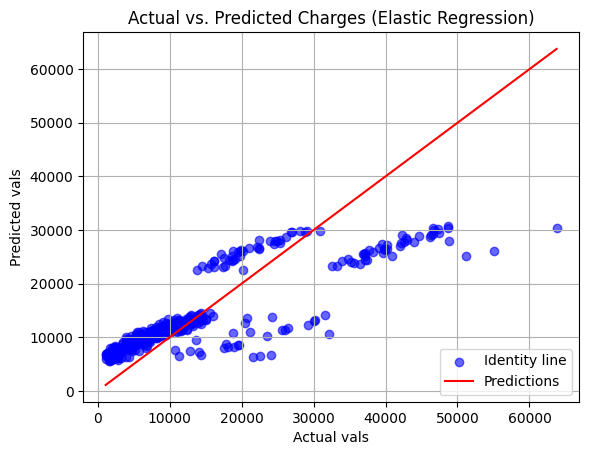

In [91]:
plt.scatter(y_test, elastic_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')

plt.xlabel('Actual vals')
plt.ylabel('Predicted vals')
plt.title('Actual vs. Predicted Charges (Elastic Regression)')

plt.legend(['Identity line', 'Predictions'], loc='lower right')

plt.grid(True)
plt.show()

In [92]:
models = {'reg': reg, 'ridge': ridge, 'lasso': lasso, 'bayesian': bayesian, 'elastic': elastic}

best_model_name = None
best_r2_score = -float('inf')

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model_name = model_name

print(f"The best model is {best_model_name} with R^2 score of {best_r2_score}")

The best model is reg with R^2 score of 0.7463198499483352
